## Fees research
Based on MIM protocol
Refer to this document: https://hackmd.io/z3y2mMdCRtGYoHEJ-17tXw?both

### How to get some revenue out of fees?
There are multiple types of fees in MIM protocol, but we are mostly interested in borrow fee:
This fee is added to debt every time MIM is borrowed.

As an example, if you borrow 1000 MIMs your debt will be increased to 1000.5 MIMs but you will actually receive 1000 MIM. These 0.5 MIMs will be distributed to sSPELL holders

MIM protocol owns 30% of SPELL token, potentially getting 30% of fees generated from borrowing(if staked):

![](https://3232147659-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-Mc9U0yE30Tc9xb3mVGA%2F-MlVGO-O-0eCUTb-XK1Y%2F-MlVLeXA6fo0aFM-qo5T%2FScreenshot%202021-10-08%20at%2015.41.53.png?alt=media&token=58577811-2734-45d2-8bed-187fcf72da2c)

---

## Fees simulation
Let's assume if we could capture 30% of fees as MIM by staking token and getting protocol fees

In [9]:
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display_functions import display
from IPython.display import HTML
from matplotlib.lines import Line2D

from notebooks.ebtc_research.generate_data import MIM_LEVERAGES
from notebooks.ebtc_research.generate_data import get_tables_mimlike

plt.style.use('seaborn')
pd.set_option('display.max_rows', 500)

TABLE_HEADERS = ["Volume in $", "Treasury Capture", "Projected Yearly Revenue in $", "Borrow Fee", "Leverage"]
revenue_tables, volumes = get_tables_mimlike()
df = pd.DataFrame(data=[*revenue_tables], columns=TABLE_HEADERS)
display(HTML(df.to_html(index=False)))

Volume in $,Treasury Capture,Projected Yearly Revenue in $,Borrow Fee,Leverage
1000000.0000,30.0%,5000.0,0.5%,1
1000000.0000,30.0%,10000.0,0.5%,2
1000000.0000,30.0%,15000.0,0.5%,3
1000000.0000,30.0%,20000.0,0.5%,4
1000000.0000,30.0%,25000.0,0.5%,5
1000000.0000,30.0%,30000.0,0.5%,6
-,-,-,-,-
2000000.0000,30.0%,10000.0,0.5%,1
2000000.0000,30.0%,20000.0,0.5%,2
2000000.0000,30.0%,30000.0,0.5%,3


## Simple simulation projecting revenue from Borrow fee

This gives an elementary overview of how much revenue we can capture if we own 30% of protocol fees taken from borrowing
Each line on plot below represents different volume, starting from \$1m anually and going up to 15m

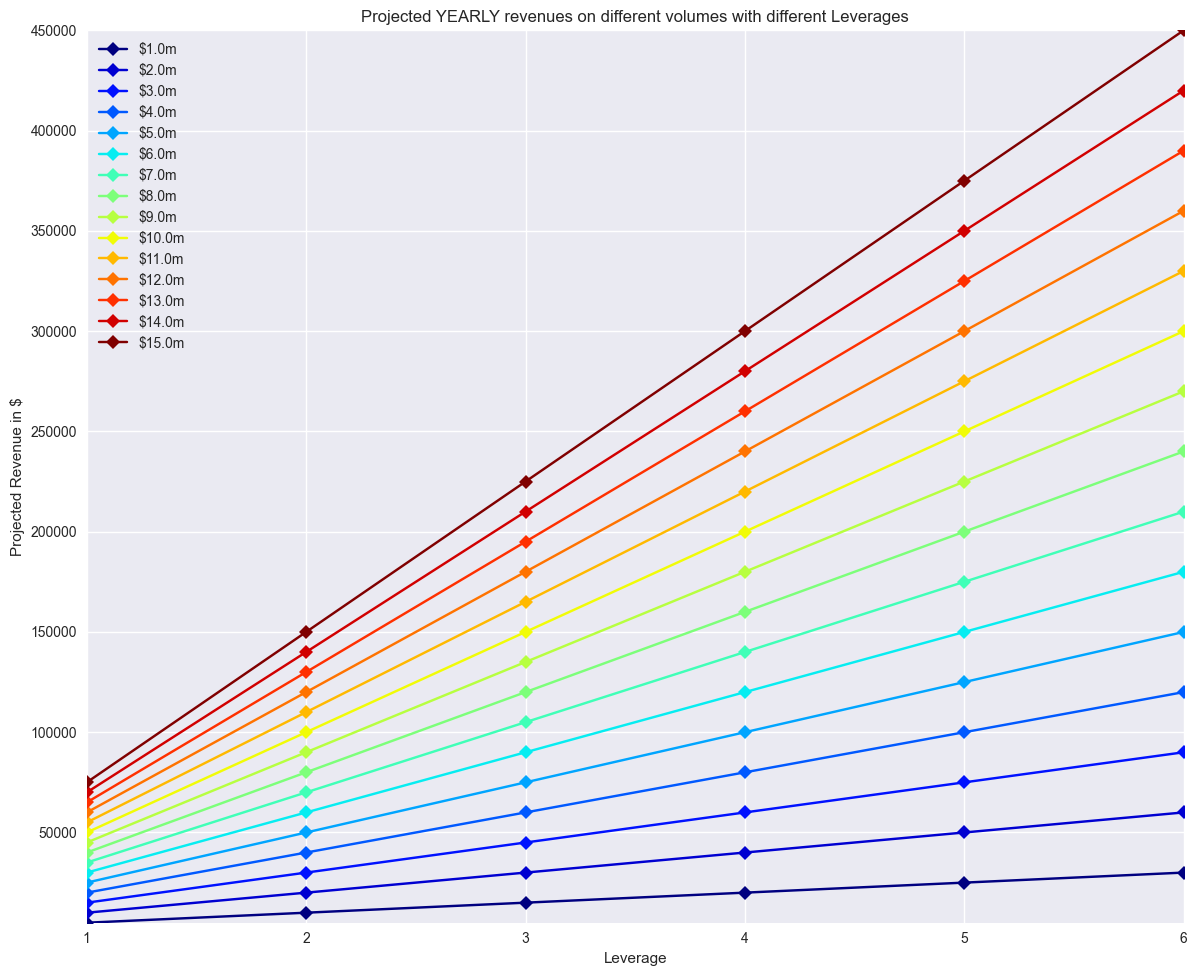

In [10]:
# Remove empty rows
df.drop(df.loc[df['Leverage'] == "-"].index, inplace=True)
volumes_set = set([table[0] for table in revenue_tables if table[0] != "-"])
volumes_list = list(volumes_set)
volumes_list = sorted(volumes_list, key=lambda v: float(v))
revenues = [table[2] for table in revenue_tables if table[0] != "-"]

fig, ax = plt.subplots()
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(12)
colors = pl.cm.jet(np.linspace(0, 1, len(volumes_list)))
for index, volume in enumerate(volumes_list):
    df_located = df.loc[df['Volume in $'] == volume]
    line = Line2D(df_located['Leverage'].tolist(), df_located['Projected Yearly Revenue in $'].tolist(), c=colors[index], marker="D", rasterized=True)
    ax.add_line(line)
    line.set_label(f"${float(volume) / 1000000}m")
ax.legend()
ax.set_title('Projected YEARLY revenues on different volumes with different Leverages')
ax.set_ylabel('Projected Revenue in $')
ax.set_xlabel('Leverage')
ax.set_xlim(min(MIM_LEVERAGES), max(MIM_LEVERAGES))
ax.set_ylim(min(revenues), max(revenues))
plt.show()
